In [1]:
import requests
from bs4 import BeautifulSoup

def craw_test(l):
    count = 0
    url = 'https://www.bbc.co.uk/sport'
    source_code = requests.get(url)
    plain_text = source_code.text
    soup = BeautifulSoup(plain_text,"lxml")
    for link in soup.findAll('p',{'class':"ssrcss-6arcww-PromoHeadline e1f5wbog4"}):
            title = link.string
            if(title != None and len(title) > 40 and count < 20):
                #print('news headlines:',title)
                l.append(title)
                count += 1
    url = 'https://www.bbc.co.uk/news/uk-politics-62239950'
    source_code = requests.get(url)
    plain_text = source_code.text
    soup = BeautifulSoup(plain_text,"lxml")
    for link in soup.findAll('p',{'class':"ssrcss-1q0x1qg-Paragraph eq5iqo00"}):
            title = link.string
            if(title != None and len(title) > 40 and count < 60):
                #print('news headlines:',title)
                l.append(title)
                count += 1
    count = 0
    url = 'https://www.bbc.co.uk/news/politics'
    source_code = requests.get(url)
    plain_text = source_code.text
    soup = BeautifulSoup(plain_text,"lxml")
    for link in soup.findAll('p',{'class':"gs-c-promo-summary gel-long-primer gs-u-mt nw-c-promo-summary gs-u-display-none gs-u-display-block@m"}):
        title = link.string
        #print('politics headlines:',title)
        l.append(title)
    for link in soup.findAll('a',{'class':"gs-c-promo-heading gs-o-faux-block-link__overlay-link gel-pica-bold nw-o-link-split__anchor"}):
        title = link.string
        count = 0
        if(title != None and len(title) > 40 and count < 40):
            #print('politics headlines:',title)
            l.append(title)
            count += 1
    count = 0
    url = 'https://www.bbc.co.uk/news/health-62250899'
    source_code = requests.get(url)
    plain_text = source_code.text
    soup = BeautifulSoup(plain_text,"lxml")
    for link in soup.findAll('p',{'class':"ssrcss-1q0x1qg-Paragraph eq5iqo00"}):
        title = link.string
        count = 0
        if(title != None and len(title) > 40 and count < 60):
            #print('health news:',title)
            l.append(title)
            count += 1
    return l


l = []
docs = craw_test(l)
print(len(docs))
print(docs)

122
['Commonwealth Games: Scot Miller, 75, becomes oldest gold medallist', 'Watch: Pick from 11 Commonwealth Games streams', 'Premier League build-up and news conferences', 'Laugher wins second gold in 24 hours with Harding', 'Chelsea sign Brighton defender Cucurella for Â£60m', "Stokes' warning 'absolutely' heard - Connor", "Sky's Tyler apologises over Hillsborough remark", 'Jonas to fight for second world title in Liverpool', 'Listen: One-Day Cup - commentary from three games', "Commonwealth Games: What's happening on day eight?", 'Miller, 75, becomes oldest medallist as Scots win gold', 'Hunter-Spivey & Stacey guaranteed at least silver', 'England beat New Zealand to line up Australia semi', 'Major signings, new teams & rule changes - the big kick-off', "Chris Sutton's Premier League predictions for opening weekend", "'We know we have to change' - Klopp likens fixture congestion to climate change", "Ten Hag 'really happy' to have Ronaldo in squad", 'Premier League predictions: Who w

In [38]:
import nltk
nltk.download("stopwords")
from nltk.corpus import stopwords

sw = stopwords.words('english')
print(sw)


['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

[nltk_data] Downloading package stopwords to C:\Users\Bharathi
[nltk_data]     Kondaveeti\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [126]:
nltk.download("punkt")
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer

ps = PorterStemmer()
filtered_docs = []
for doc in docs:
    tokens = word_tokenize(doc)
    tmp = ""
    for w in tokens:
        if w not in sw:
            tmp += ps.stem(w) + " "
    filtered_docs.append(tmp)

print(filtered_docs)


['commonwealth game : 16 medal event first day - watch ', 'rossouw hit 96 south africa level t20 seri ', "'now never ' - hurdler allen chase nfl dream ", 'watch : pick 11 commonwealth game stream ', 'a decad develop , six landmark moment ', 'arsen & northern ireland legend neill die 80 ', "hamilton & alonso lead tribut 'legend ' vettel ", "jamaica 's ex-gb athlet tracey rule game ", "man citi abandon cucurella plan - friday 's gossip ", "stenson feel 'gave ' ryder cup role ", 'anger pro-putin chant turkey footbal match ', 'motherwel dump europ inspir sligo ', 'crusad bow europ basel draw ', 'rage bull & nobel laureat - commonwealth game open style ', 'commonwealth game day-by-day guid & schedul ', "'mi brother hung door , made ' ", 'bbc tv , radio & digit coverag time commonwealth game ', "' i want leav legaci ' - fachi 's quest glori ", 'england aim gold cricket return game ', "flagbear gilmour 's letter 16-year-old self ", "watch key moment bori johnson 's final pmq ", "if bori johns

[nltk_data] Downloading package punkt to C:\Users\Bharathi
[nltk_data]     Kondaveeti\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [129]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(filtered_docs)
print(X.todense())
print(X)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
  (0, 769)	0.3435976882426375
  (0, 195)	0.328543241879226
  (0, 283)	0.3158148888410524
  (0, 253)	0.38577699544728233
  (0, 473)	0.419256595060111
  (0, 3)	0.38577699544728233
  (0, 302)	0.3047890879239983
  (0, 150)	0.328543241879226
  (1, 635)	0.35355339059327373
  (1, 689)	0.35355339059327373
  (1, 437)	0.35355339059327373
  (1, 29)	0.35355339059327373
  (1, 656)	0.35355339059327373
  (1, 17)	0.35355339059327373
  (1, 356)	0.35355339059327373
  (1, 610)	0.35355339059327373
  (2, 229)	0.3779644730092272
  (2, 498)	0.3779644730092272
  (2, 127)	0.3779644730092272
  (2, 36)	0.3779644730092272
  (2, 371)	0.3779644730092272
  (2, 496)	0.3779644730092272
  (2, 504)	0.3779644730092272
  (3, 675)	0.4557608899406954
  (3, 1)	0.4557608899406954
  :	:
  (114, 185)	0.2653584033848646
  (114, 460)	0.2653584033848646
  (114, 772)	0.244168294

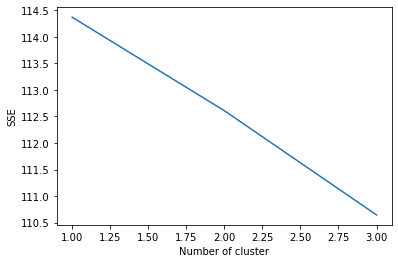

In [158]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
sse = {}
for k in range(1,4):
    kmeans = KMeans(n_clusters=k, max_iter=5).fit(X)
    #data["clusters"] = kmeans.labels_
    #print(data["clusters"])
    sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

In [159]:
from sklearn.cluster import KMeans
K = 3
model = KMeans(n_clusters=K)#, init='k-means++', max_iter=100, n_init=1)
model.fit(X)

print("cluster no. of input documents, in the order they received:")
print(model.labels_)

cluster no. of input documents, in the order they received:
[0 0 1 0 0 0 1 1 1 0 1 1 0 0 0 0 0 0 0 0 1 1 1 1 0 0 2 1 0 1 1 1 1 1 0 1 0
 1 1 1 1 1 1 1 1 0 0 1 1 0 2 1 1 1 1 1 1 1 1 1 2 2 1 1 1 1 2 2 1 2 2 0 0 2
 2 2 0 0 2 0 0 0 0 1 0 2 1 0 0 0 1 1 0 0 1 0 0 0 1 0 1 0 0 2 0 0 0 0 0 0 0
 1 0 0 0 0 0]


In [164]:
test_doc = ["The Covid pandemic had a devastating impact on ethnic minority communities",
             "Boris Johnson was expecting a teary-eyed send off from all MPs",
             "care home residents died of Covid in England and Wales",
            "England on top in first T20 v South Africa",
            "contest to elect his replacement as Tory leader and prime minister is due to conclude",
            "Vingegaard close to Tour victory after stage 18 win",
            "Birmingham attempts to leave 'carbon neutral legacy",
            "Coe says global warming could force move of events",
            "16 medal event first day - watch ",
            "France wins world cup in football",
            "Sunak says yes to return of grammar schools"
           ]
filtered_test_docs = []
for doc in test_doc:
    tokens = word_tokenize(doc)
    tmp = ""
    for w in tokens:
        if w not in sw:
            tmp += ps.stem(w) + " "
    filtered_test_docs.append(tmp)

print(filtered_test_docs)
prediction = []
labels_pred = []
for i in range(len(filtered_test_docs)):
    Y = vectorizer.transform([filtered_test_docs[i]])
    prediction=(model.predict(Y))
    print(prediction)
    labels_pred.append(prediction[0])

['the covid pandem devast impact ethnic minor commun ', 'bori johnson expect teary-ey send mp ', 'care home resid die covid england wale ', 'england top first t20 v south africa ', 'contest elect replac tori leader prime minist due conclud ', 'vingegaard close tour victori stage 18 win ', "birmingham attempt leav 'carbon neutral legaci ", 'coe say global warm could forc move event ', '16 medal event first day - watch ', 'franc win world cup footbal ', 'sunak say ye return grammar school ']
[0]
[1]
[0]
[0]
[1]
[0]
[0]
[0]
[0]
[0]
[2]


In [165]:
#rand index - performance measure of k-mean cluster
from sklearn import metrics
labels_true = [0,1,0,2,1,2,0,0,2,2,2]
metrics.rand_score(labels_true, labels_pred)

0.6363636363636364